In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
import backtrader as bt
import datetime
import yfinance as yf

In [2]:
tsla=yf.download("TSLA")

[*********************100%***********************]  1 of 1 completed


In [3]:
tsla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-03-31,197.529999,207.789993,197.199997,207.460007,207.460007,169638500
2023-04-03,199.910004,202.690002,192.199997,194.770004,194.770004,169545900
2023-04-04,197.320007,198.740005,190.320007,192.580002,192.580002,126463800


## Data parsing

In [4]:
tsla_bt=bt.feeds.PandasData(dataname=tsla)
tsla_bt

## Momentum strategy
if close[2] > close[1] ----> buy
if close[2] < close[1] ----> sell

In [5]:
# Lets define a strategy

class Momentum(bt.Strategy):
    def __init__(self):
        self.dataclose=self.datas[0].close
        
    def next(self):
        if self.dataclose[-2] > self.dataclose[-1]:
            self.order=self.buy()
            print(f"Buy executed @ {self.dataclose[0]}")
        if self.dataclose[-2] < self.dataclose[-1]:
            self.order=self.sell()
            print(f"Sell executed @ {self.dataclose[0]}")
        else:
            self.order=self.close()
            print(f"Closing @ {self.dataclose[0]}")

In [6]:
cerebro=bt.Cerebro()

In [7]:
cerebro.addstrategy(Momentum)

0

In [8]:
cerebro.adddata(tsla_bt)

In [9]:
cerebro.run()

Buy executed @ 1.5926669836044312
Closing @ 1.5926669836044312
Buy executed @ 1.5886670351028442
Closing @ 1.5886670351028442
Buy executed @ 1.4639999866485596
Closing @ 1.4639999866485596
Buy executed @ 1.2799999713897705
Closing @ 1.2799999713897705
Buy executed @ 1.0740000009536743
Closing @ 1.0740000009536743
Buy executed @ 1.053333044052124
Closing @ 1.053333044052124
Buy executed @ 1.1640000343322754
Closing @ 1.1640000343322754
Sell executed @ 1.159999966621399
Buy executed @ 1.136667013168335
Closing @ 1.136667013168335
Buy executed @ 1.2093329429626465
Closing @ 1.2093329429626465
Sell executed @ 1.3226670026779175
Sell executed @ 1.3259999752044678
Sell executed @ 1.3760000467300415
Sell executed @ 1.4606670141220093
Sell executed @ 1.3533329963684082
Buy executed @ 1.3480000495910645
Closing @ 1.3480000495910645
Buy executed @ 1.399999976158142
Closing @ 1.399999976158142
Sell executed @ 1.4193329811096191
Sell executed @ 1.3966670036315918
Buy executed @ 1.3700000047683716


Buy executed @ 1.8533329963684082
Closing @ 1.8533329963684082
Sell executed @ 1.8626669645309448
Sell executed @ 1.8700000047683716
Sell executed @ 1.8279999494552612
Buy executed @ 1.8893330097198486
Closing @ 1.8893330097198486
Sell executed @ 1.8380000591278076
Buy executed @ 1.8226670026779175
Closing @ 1.8226670026779175
Buy executed @ 1.8686670064926147
Closing @ 1.8686670064926147
Sell executed @ 1.9033329486846924
Sell executed @ 1.8833329677581787
Buy executed @ 1.8653329610824585
Closing @ 1.8653329610824585
Buy executed @ 1.9173330068588257
Closing @ 1.9173330068588257
Sell executed @ 1.9913330078125
Sell executed @ 1.9579999446868896
Buy executed @ 1.925333023071289
Closing @ 1.925333023071289
Buy executed @ 1.9140000343322754
Closing @ 1.9140000343322754
Buy executed @ 2.1640000343322754
Closing @ 2.1640000343322754
Sell executed @ 2.1540000438690186
Buy executed @ 2.0846669673919678
Closing @ 2.0846669673919678
Buy executed @ 2.122667074203491
Closing @ 2.122667074203491

Sell executed @ 2.551332950592041
Buy executed @ 2.4693329334259033
Closing @ 2.4693329334259033
Buy executed @ 2.618666887283325
Closing @ 2.618666887283325
Sell executed @ 2.569333076477051
Buy executed @ 2.3440001010894775
Closing @ 2.3440001010894775
Buy executed @ 2.4073328971862793
Closing @ 2.4073328971862793
Sell executed @ 2.2920000553131104
Buy executed @ 2.295332908630371
Closing @ 2.295332908630371
Sell executed @ 2.3399999141693115
Sell executed @ 2.322000026702881
Buy executed @ 2.309999942779541
Closing @ 2.309999942779541
Buy executed @ 2.371999979019165
Closing @ 2.371999979019165
Sell executed @ 2.4433329105377197
Sell executed @ 2.512666940689087
Sell executed @ 2.5486669540405273
Sell executed @ 2.564666986465454
Sell executed @ 2.6066670417785645
Sell executed @ 2.6080000400543213
Sell executed @ 2.5986669063568115
Buy executed @ 2.456666946411133
Closing @ 2.456666946411133
Buy executed @ 2.3526670932769775
Closing @ 2.3526670932769775
Buy executed @ 2.34333300590

Buy executed @ 8.140000343322754
Closing @ 8.140000343322754
Sell executed @ 8.092000007629395
Buy executed @ 8.055999755859375
Closing @ 8.055999755859375
Buy executed @ 8.033332824707031
Closing @ 8.033332824707031
Buy executed @ 8.462667465209961
Closing @ 8.462667465209961
Sell executed @ 8.485333442687988
Sell executed @ 8.277999877929688
Buy executed @ 9.646666526794434
Closing @ 9.646666526794434
Sell executed @ 9.263333320617676
Buy executed @ 9.36533260345459
Closing @ 9.36533260345459
Sell executed @ 9.157333374023438
Buy executed @ 9.4399995803833
Closing @ 9.4399995803833
Sell executed @ 9.47933292388916
Sell executed @ 9.3100004196167
Buy executed @ 9.83133316040039
Closing @ 9.83133316040039
Sell executed @ 9.84333324432373
Sell executed @ 9.862667083740234
Sell executed @ 10.163999557495117
Sell executed @ 9.86533260345459
Buy executed @ 9.381333351135254
Closing @ 9.381333351135254
Buy executed @ 9.549332618713379
Closing @ 9.549332618713379
Sell executed @ 9.5699996948

Sell executed @ 16.54199981689453
Buy executed @ 17.288000106811523
Closing @ 17.288000106811523
Sell executed @ 17.33066749572754
Sell executed @ 17.354000091552734
Sell executed @ 17.42533302307129
Sell executed @ 17.46733283996582
Sell executed @ 17.32933235168457
Buy executed @ 17.117332458496094
Closing @ 17.117332458496094
Buy executed @ 17.047332763671875
Closing @ 17.047332763671875
Buy executed @ 16.95599937438965
Closing @ 16.95599937438965
Buy executed @ 17.118667602539062
Closing @ 17.118667602539062
Sell executed @ 17.503332138061523
Sell executed @ 17.44933319091797
Buy executed @ 17.549999237060547
Closing @ 17.549999237060547
Sell executed @ 17.590667724609375
Sell executed @ 17.979999542236328
Sell executed @ 18.941333770751953
Sell executed @ 18.746000289916992
Buy executed @ 19.069332122802734
Closing @ 19.069332122802734
Sell executed @ 18.492666244506836
Buy executed @ 18.80733299255371
Closing @ 18.80733299255371
Sell executed @ 18.565332412719727
Buy executed @ 1

Sell executed @ 13.684666633605957
Buy executed @ 13.96066665649414
Closing @ 13.96066665649414
Sell executed @ 14.629332542419434
Sell executed @ 14.573332786560059
Buy executed @ 14.562000274658203
Closing @ 14.562000274658203
Buy executed @ 15.436667442321777
Closing @ 15.436667442321777
Sell executed @ 15.36533260345459
Buy executed @ 15.49666690826416
Closing @ 15.49666690826416
Sell executed @ 15.069999694824219
Buy executed @ 15.0686674118042
Closing @ 15.0686674118042
Buy executed @ 15.36733341217041
Closing @ 15.36733341217041
Sell executed @ 15.529999732971191
Sell executed @ 15.362000465393066
Buy executed @ 15.786666870117188
Closing @ 15.786666870117188
Sell executed @ 15.77400016784668
Buy executed @ 15.965999603271484
Closing @ 15.965999603271484
Sell executed @ 16.31599998474121
Sell executed @ 16.211999893188477
Buy executed @ 16.273332595825195
Closing @ 16.273332595825195
Sell executed @ 16.589332580566406
Sell executed @ 16.583332061767578
Buy executed @ 16.47599983

Buy executed @ 14.376667022705078
Closing @ 14.376667022705078
Buy executed @ 14.066666603088379
Closing @ 14.066666603088379
Buy executed @ 13.856666564941406
Closing @ 13.856666564941406
Buy executed @ 13.998000144958496
Closing @ 13.998000144958496
Sell executed @ 13.354000091552734
Buy executed @ 13.745332717895508
Closing @ 13.745332717895508
Sell executed @ 13.666000366210938
Buy executed @ 13.64799976348877
Closing @ 13.64799976348877
Buy executed @ 13.24666690826416
Closing @ 13.24666690826416
Buy executed @ 13.33133316040039
Closing @ 13.33133316040039
Sell executed @ 13.50333309173584
Sell executed @ 13.092000007629395
Buy executed @ 12.904000282287598
Closing @ 12.904000282287598
Buy executed @ 12.538000106811523
Closing @ 12.538000106811523
Buy executed @ 12.646666526794434
Closing @ 12.646666526794434
Sell executed @ 12.74666690826416
Sell executed @ 13.129332542419434
Sell executed @ 12.185333251953125
Buy executed @ 11.565333366394043
Closing @ 11.565333366394043
Buy exe

Buy executed @ 13.897333145141602
Closing @ 13.897333145141602
Buy executed @ 13.399999618530273
Closing @ 13.399999618530273
Buy executed @ 13.107333183288574
Closing @ 13.107333183288574
Buy executed @ 13.396666526794434
Closing @ 13.396666526794434
Sell executed @ 13.34000015258789
Buy executed @ 13.434000015258789
Closing @ 13.434000015258789
Sell executed @ 13.349332809448242
Buy executed @ 13.100666999816895
Closing @ 13.100666999816895
Buy executed @ 12.93066692352295
Closing @ 12.93066692352295
Buy executed @ 13.273332595825195
Closing @ 13.273332595825195
Sell executed @ 13.570667266845703
Sell executed @ 13.273332595825195
Buy executed @ 13.339332580566406
Closing @ 13.339332580566406
Sell executed @ 13.517333030700684
Sell executed @ 13.489333152770996
Buy executed @ 13.482666969299316
Closing @ 13.482666969299316
Buy executed @ 13.600666999816895
Closing @ 13.600666999816895
Sell executed @ 13.33133316040039
Buy executed @ 13.182000160217285
Closing @ 13.182000160217285
Buy

Sell executed @ 25.166000366210938
Buy executed @ 24.158000946044922
Closing @ 24.158000946044922
Buy executed @ 24.749332427978516
Closing @ 24.749332427978516
Sell executed @ 24.049999237060547
Buy executed @ 24.107332229614258
Closing @ 24.107332229614258
Sell executed @ 23.507999420166016
Buy executed @ 21.805999755859375
Closing @ 21.805999755859375
Buy executed @ 20.588666915893555
Closing @ 20.588666915893555
Buy executed @ 20.881332397460938
Closing @ 20.881332397460938
Sell executed @ 21.06999969482422
Sell executed @ 21.814666748046875
Sell executed @ 21.968000411987305
Sell executed @ 21.560667037963867
Buy executed @ 21.851999282836914
Closing @ 21.851999282836914
Sell executed @ 21.30466651916504
Buy executed @ 21.882667541503906
Closing @ 21.882667541503906
Sell executed @ 21.68400001525879
Buy executed @ 21.994667053222656
Closing @ 21.994667053222656
Sell executed @ 21.893333435058594
Buy executed @ 22.834667205810547
Closing @ 22.834667205810547
Sell executed @ 22.6399

Closing @ 20.90399932861328
Buy executed @ 20.703332901000977
Closing @ 20.703332901000977
Buy executed @ 21.101999282836914
Closing @ 21.101999282836914
Sell executed @ 20.606666564941406
Buy executed @ 20.1026668548584
Closing @ 20.1026668548584
Buy executed @ 20.278667449951172
Closing @ 20.278667449951172
Sell executed @ 18.61199951171875
Buy executed @ 17.185333251953125
Closing @ 17.185333251953125
Buy executed @ 17.742000579833984
Closing @ 17.742000579833984
Sell executed @ 16.832000732421875
Buy executed @ 17.8353328704834
Closing @ 17.8353328704834
Sell executed @ 19.12933349609375
Sell executed @ 20.381332397460938
Sell executed @ 19.953332901000977
Buy executed @ 19.310667037963867
Closing @ 19.310667037963867
Buy executed @ 20.31333351135254
Closing @ 20.31333351135254
Sell executed @ 20.062000274658203
Buy executed @ 19.60533332824707
Closing @ 19.60533332824707
Buy executed @ 20.022666931152344
Closing @ 20.022666931152344
Sell executed @ 19.413999557495117
Buy executed 

Buy executed @ 21.73933219909668
Closing @ 21.73933219909668
Sell executed @ 21.075332641601562
Buy executed @ 22.257999420166016
Closing @ 22.257999420166016
Sell executed @ 22.18666648864746
Buy executed @ 20.674667358398438
Closing @ 20.674667358398438
Buy executed @ 20.02400016784668
Closing @ 20.02400016784668
Buy executed @ 21.179332733154297
Closing @ 21.179332733154297
Sell executed @ 22.33066749572754
Sell executed @ 22.356666564941406
Sell executed @ 22.568666458129883
Sell executed @ 22.99799919128418
Sell executed @ 23.150667190551758
Sell executed @ 22.293333053588867
Buy executed @ 22.961999893188477
Closing @ 22.961999893188477
Sell executed @ 23.06999969482422
Sell executed @ 23.15399932861328
Sell executed @ 20.150667190551758
Buy executed @ 19.92799949645996
Closing @ 19.92799949645996
Buy executed @ 19.172666549682617
Closing @ 19.172666549682617
Buy executed @ 19.43400001525879
Closing @ 19.43400001525879
Sell executed @ 19.80266761779785
Sell executed @ 19.75866699

Closing @ 21.000667572021484
Buy executed @ 20.994667053222656
Closing @ 20.994667053222656
Buy executed @ 20.887332916259766
Closing @ 20.887332916259766
Buy executed @ 21.1646671295166
Closing @ 21.1646671295166
Sell executed @ 21.148000717163086
Buy executed @ 21.77199935913086
Closing @ 21.77199935913086
Sell executed @ 22.369333267211914
Sell executed @ 22.47599983215332
Sell executed @ 23.006000518798828
Sell executed @ 23.32866668701172
Sell executed @ 23.073999404907227
Buy executed @ 23.290000915527344
Closing @ 23.290000915527344
Sell executed @ 23.47800064086914
Sell executed @ 23.332666397094727
Buy executed @ 23.968000411987305
Closing @ 23.968000411987305
Sell executed @ 23.481332778930664
Buy executed @ 23.655332565307617
Closing @ 23.655332565307617
Sell executed @ 22.202667236328125
Buy executed @ 22.422666549682617
Closing @ 22.422666549682617
Sell executed @ 21.92799949645996
Buy executed @ 22.086000442504883
Closing @ 22.086000442504883
Sell executed @ 21.9960002899

Buy executed @ 166.10667419433594
Closing @ 166.10667419433594
Sell executed @ 158.35000610351562
Buy executed @ 149.1233367919922
Closing @ 149.1233367919922
Buy executed @ 135.6666717529297
Closing @ 135.6666717529297
Buy executed @ 139.44000244140625
Closing @ 139.44000244140625
Sell executed @ 110.06999969482422
Buy executed @ 122.09333038330078
Closing @ 122.09333038330078
Sell executed @ 123.77999877929688
Sell executed @ 124.23999786376953
Sell executed @ 139.8733367919922
Sell executed @ 149.9199981689453
Sell executed @ 147.25332641601562
Buy executed @ 141.14332580566406
Closing @ 141.14332580566406
Buy executed @ 147.38333129882812
Closing @ 147.38333129882812
Sell executed @ 149.79666137695312
Sell executed @ 141.41000366210938
Buy executed @ 126.78666687011719
Closing @ 126.78666687011719
Buy executed @ 129.26333618164062
Closing @ 129.26333618164062
Sell executed @ 135.77999877929688
Sell executed @ 140.39999389648438
Sell executed @ 139.69000244140625
Buy executed @ 143.

Sell executed @ 201.56333923339844
Buy executed @ 206.3766632080078
Closing @ 206.3766632080078
Sell executed @ 210.28334045410156
Sell executed @ 208.4066619873047
Buy executed @ 207.96665954589844
Closing @ 207.96665954589844
Buy executed @ 201.7066650390625
Closing @ 201.7066650390625
Buy executed @ 190.94667053222656
Closing @ 190.94667053222656
Buy executed @ 199.68333435058594
Closing @ 199.68333435058594
Sell executed @ 201.7100067138672
Sell executed @ 201.19667053222656
Buy executed @ 199.5933380126953
Closing @ 199.5933380126953
Buy executed @ 203.3733367919922
Closing @ 203.3733367919922
Sell executed @ 203.29666137695312
Buy executed @ 205.89666748046875
Closing @ 205.89666748046875
Sell executed @ 199.7866668701172
Buy executed @ 201.6233367919922
Closing @ 201.6233367919922
Sell executed @ 205.53334045410156
Sell executed @ 207.77000427246094
Sell executed @ 206.94332885742188
Buy executed @ 207.90333557128906
Closing @ 207.90333557128906
Sell executed @ 218.8566741943359

Sell executed @ 288.1233215332031
Buy executed @ 293.2966613769531
Closing @ 293.2966613769531
Sell executed @ 279.7633361816406
Buy executed @ 279.42999267578125
Closing @ 279.42999267578125
Buy executed @ 268.1933288574219
Closing @ 268.1933288574219
Buy executed @ 274.79998779296875
Closing @ 274.79998779296875
Sell executed @ 286.3233337402344
Sell executed @ 279.4333190917969
Buy executed @ 265.1166687011719
Closing @ 265.1166687011719
Buy executed @ 255.4566650390625
Closing @ 255.4566650390625
Buy executed @ 267.2966613769531
Closing @ 267.2966613769531
Sell executed @ 280.07666015625
Sell executed @ 290.5333251953125
Sell executed @ 301.7966613769531
Sell executed @ 307.0533447265625
Sell executed @ 331.32666015625
Sell executed @ 333.03668212890625
Sell executed @ 337.97332763671875
Sell executed @ 336.8800048828125
Buy executed @ 363.9466552734375
Closing @ 363.9466552734375
Sell executed @ 366.5233459472656
Sell executed @ 364.663330078125
Buy executed @ 359.20001220703125
C

Buy executed @ 167.8699951171875
Closing @ 167.8699951171875
Buy executed @ 169.91000366210938
Closing @ 169.91000366210938
Sell executed @ 183.1999969482422
Sell executed @ 182.86000061035156
Buy executed @ 182.9199981689453
Closing @ 182.9199981689453
Sell executed @ 180.8300018310547
Buy executed @ 194.6999969482422
Closing @ 194.6999969482422
Sell executed @ 194.6999969482422
Closing @ 194.86000061035156
Sell executed @ 182.4499969482422
Buy executed @ 179.82000732421875
Closing @ 179.82000732421875
Buy executed @ 174.0399932861328
Closing @ 174.0399932861328
Buy executed @ 173.44000244140625
Closing @ 173.44000244140625
Buy executed @ 179.0500030517578
Closing @ 179.0500030517578
Sell executed @ 167.82000732421875
Buy executed @ 160.9499969482422
Closing @ 160.9499969482422
Buy executed @ 156.8000030517578
Closing @ 156.8000030517578
Buy executed @ 157.6699981689453
Closing @ 157.6699981689453
Sell executed @ 150.22999572753906
Buy executed @ 149.8699951171875
Closing @ 149.869995

<IPython.core.display.Javascript object>


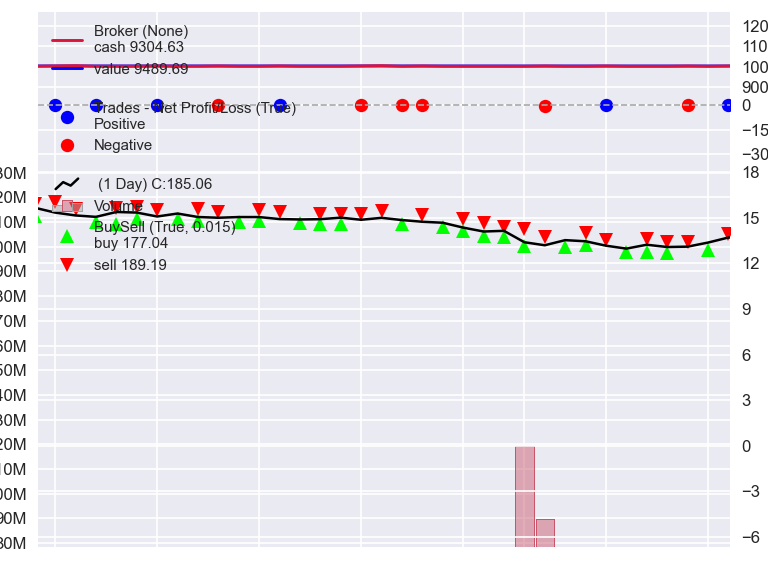

[[<Figure size 640x480 with 4 Axes>]]

In [10]:
%matplotlib widget
cerebro.plot(iplot=True,valume=False)